### Importingdata

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import re

In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [2]:
my_data = pd.read_csv(r'dataset\data.csv', encoding = "ISO-8859-1", header=None)

In [3]:
my_data.sample(10)

,0,1,2,3,4,5
1527267,4,2177164881,Mon Jun 15 05:35:01 PDT 2009,NO_QUERY,islandchic,"@JayMurda Morning to you, It's evening for me ..."
1240998,4,1993906405,Mon Jun 01 11:06:46 PDT 2009,NO_QUERY,THChicago,Still not up...twitter is still working proper...
951565,4,1824267923,Sun May 17 00:40:30 PDT 2009,NO_QUERY,xo_mcflyandjb,wants to read Tams oneshot
1219030,4,1989894157,Mon Jun 01 03:10:52 PDT 2009,NO_QUERY,Genisys2009,@jemK have you had any joy with finding a solu...
1446765,4,2062546489,Sat Jun 06 23:33:03 PDT 2009,NO_QUERY,MacBrittani,"yeay, im on the phone with miqueL hes admazin..."
219705,0,1976458220,Sat May 30 17:22:37 PDT 2009,NO_QUERY,nessie_111,watching sky 3.. sky1's cheap version.. wow th...
421819,0,2062504480,Sat Jun 06 23:25:32 PDT 2009,NO_QUERY,1love7even,Well me and My Ego are gonna hit the sheets......
1177598,4,1981440252,Sun May 31 09:09:31 PDT 2009,NO_QUERY,NiaNaia,"@macstarr - Oh my, that is early For a Sunday...."
159868,0,1956940377,Thu May 28 23:05:01 PDT 2009,NO_QUERY,HarcoPloegman,@marklee3d Unfortunately not. Why aren't you c...
786581,0,2324693428,Thu Jun 25 03:48:43 PDT 2009,NO_QUERY,QuantaCrayton,At work feeling bad


In [4]:
my_data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
my_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
columns_to_drop = ['id', 'date', 'flag', 'user']
my_data.drop(columns_to_drop,axis=1, inplace=True)

In [6]:
my_data.head(100)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
95,0,Strider is a sick little puppy http://apps.fa...
96,0,"so rylee,grace...wana go steve's party or not?..."
97,0,"hey, I actually won one of my bracket pools! T..."
98,0,"@stark YOU don't follow me, either and i work..."


In [7]:
my_data.iloc[1,1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

### Preprocessing data


In [8]:
my_data.target.value_counts()  # check if there is an imbalance in the classes present in the target variable.

target
0    800000
4    800000
Name: count, dtype: int64

In [9]:
replace_data = {0: -1, 4: 1}
my_data.replace(replace_data, inplace=True)
my_data.target.value_counts()

target
-1    800000
 1    800000
Name: count, dtype: int64

In [10]:
my_data_copy = my_data.head(100)

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

delete_pattern = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stopwords = stopwords.words('english')
stemmer = SnowballStemmer("english")

def preprocess_text_new(text):
    # Remove link and special characters
    text = re.sub(delete_pattern, ' ', text.lower()).strip()
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords]
    # Stemming the tokens
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

In [ ]:
my_data['preprocessed_text'] =  my_data['text'].apply(preprocess_text_new)

In [ ]:
my_data.head(5)

In [ ]:
my_data.shape

In [ ]:
my_data.drop('text', axis=1, inplace = True)

In [ ]:
my_data_copy

In [ ]:
my_data.columns = ['target', 'processed_text']


In [ ]:
my_data

In [ ]:
my_data.to_pickle('my_data.pickle')

In [ ]:
%pwd

In [5]:
#######################################
import pandas as pd
# Load DataFrame from pickle file
my_data_processed = pd.read_pickle('my_data.pickle')

In [6]:
my_data_processed

,target,processed_text
0,-1,awww bummer shoulda got david carr third day
1,-1,upset updat facebook text might cri result sch...
2,-1,dive mani time ball manag save 50 rest go bound
3,-1,whole bodi feel itchi like fire
4,-1,behav mad see
...,...,...
1599995,1,woke school best feel ever
1599996,1,thewdb com cool hear old walt interview
1599997,1,readi mojo makeov ask detail
1599998,1,happi 38th birthday boo alll time tupac amaru ...


In [7]:
txt = my_data_processed["processed_text"]
targett = my_data_processed.target

In [8]:
from sklearn.model_selection import train_test_split

txt_train, txt_test, targett_train, targett_test = train_test_split(txt, targett, test_size=0.2, random_state=42)
print(txt_train.shape, txt_test.shape, targett_train.shape, targett_test.shape)

(1280000,) (320000,) (1280000,) (320000,)


In [9]:
txt_train

1374558    ya quot like palm pre touchston charger readyn...
1389115                felt earthquak afternoon seem epicent
1137831                               ruffl shirt like likey
790714     pretti bad night crappi morn fml buttfac didnt...
1117911                                      yeah clear view
                                 ...                        
259178                    song middl chang want born arghhhh
1414414                                            good luck
131932                                   rather averag 32370
671155     pickin misstinayao waitin sadittysash 2 hurri ...
121958                 home studi math wooot im go fail shit
Name: processed_text, Length: 1280000, dtype: object

In [10]:
import pickle as pk
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the vectorizer
vectorizer = TfidfVectorizer(max_features=2500)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pk.dump(vectorizer, f)
txt_train_prep = vectorizer.fit_transform(txt_train)
txt_test_prep = vectorizer.transform(txt_test)

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(txt_train_prep, targett_train)

print('Train score: ', log_reg.score(txt_train_prep, targett_train))
print('Test score: ', log_reg.score(txt_test_prep, targett_test))

Train score:  0.7630890625
Test score:  0.76185625


Classification report:
              precision    recall  f1-score   support

          -1       0.77      0.74      0.75    159494
           1       0.75      0.79      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Confusion matrix:


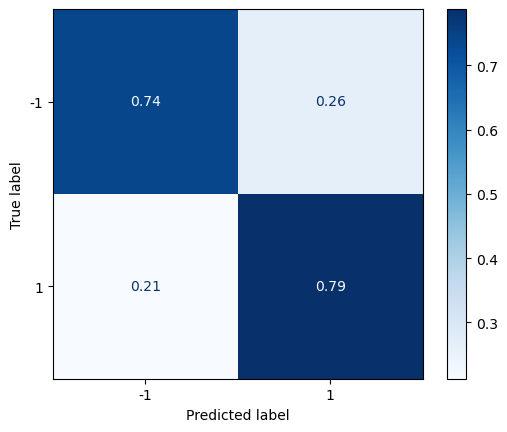

In [12]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

targett_pred = log_reg.predict(txt_test_prep)

print('Classification report:')
print(classification_report(targett_test, targett_pred))

print('Confusion matrix:')
ConfusionMatrixDisplay.from_predictions(targett_test, targett_pred, cmap='Blues', normalize='true');

In [13]:
import pickle as pk

In [14]:
pk.dump(log_reg,open('log_reg.pkl','wb'))